In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

In [5]:
data

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1


In [6]:
data.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [7]:
data.tail()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1
110203,0,0,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [9]:
data.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [10]:
data.shape

(110204, 4)

In [11]:
#checking for null values
data.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

In [12]:
#checking for missing values
data.isna().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

<Axes: ylabel='age_years'>

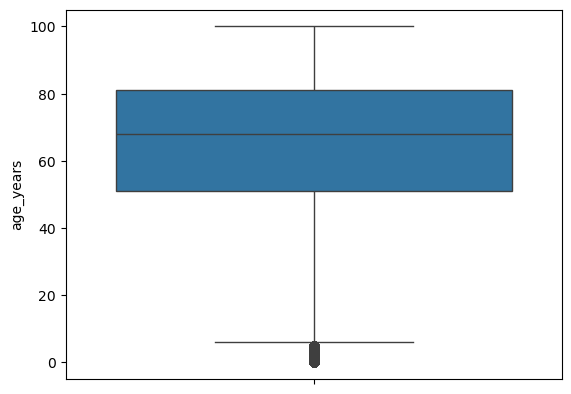

In [14]:
#datavisualisation
#univarate
sns.boxplot(data['age_years'])

C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_19748\1983247554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age_years'])


<Axes: xlabel='age_years', ylabel='Density'>

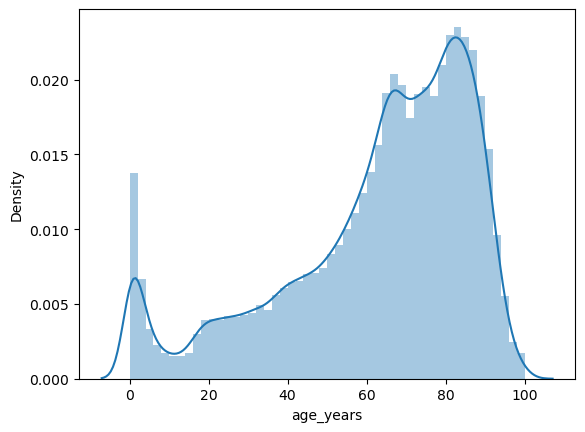

In [15]:
sns.distplot(data['age_years'])

<Axes: xlabel='sex_0male_1female', ylabel='age_years'>

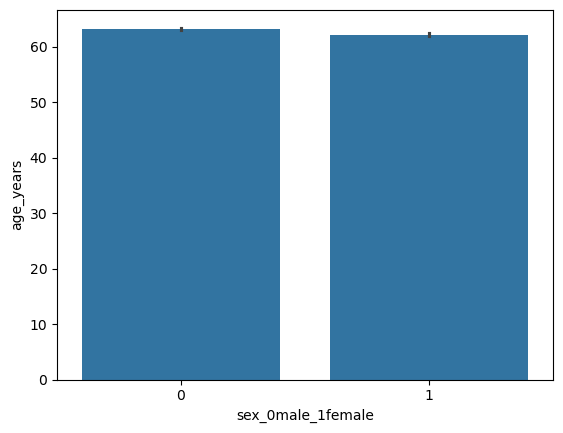

In [16]:
#bivariate visualization between sex and age variables
sns.barplot(data = data, x='sex_0male_1female',y='age_years')

In [17]:
data.corr()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
age_years,1.000000,-0.022583,0.033857,-0.170088
sex_0male_1female,-0.022583,1.000000,-0.040886,0.019796
episode_number,0.033857,-0.040886,1.000000,-0.006764
hospital_outcome_1alive_0dead,-0.170088,0.019796,-0.006764,1.000000


In [18]:
round(data.groupby(['sex_0male_1female','hospital_outcome_1alive_0dead'])[['age_years','episode_number']].mean().sort_values('age_years',ascending = False),2)

age_years  episode_number
sex_0male_1female hospital_outcome_1alive_0dead                           
1                 0                                  78.53            1.33
0                 0                                  76.34            1.40
                  1                                  62.14            1.38
1                 1                                  60.97            1.32

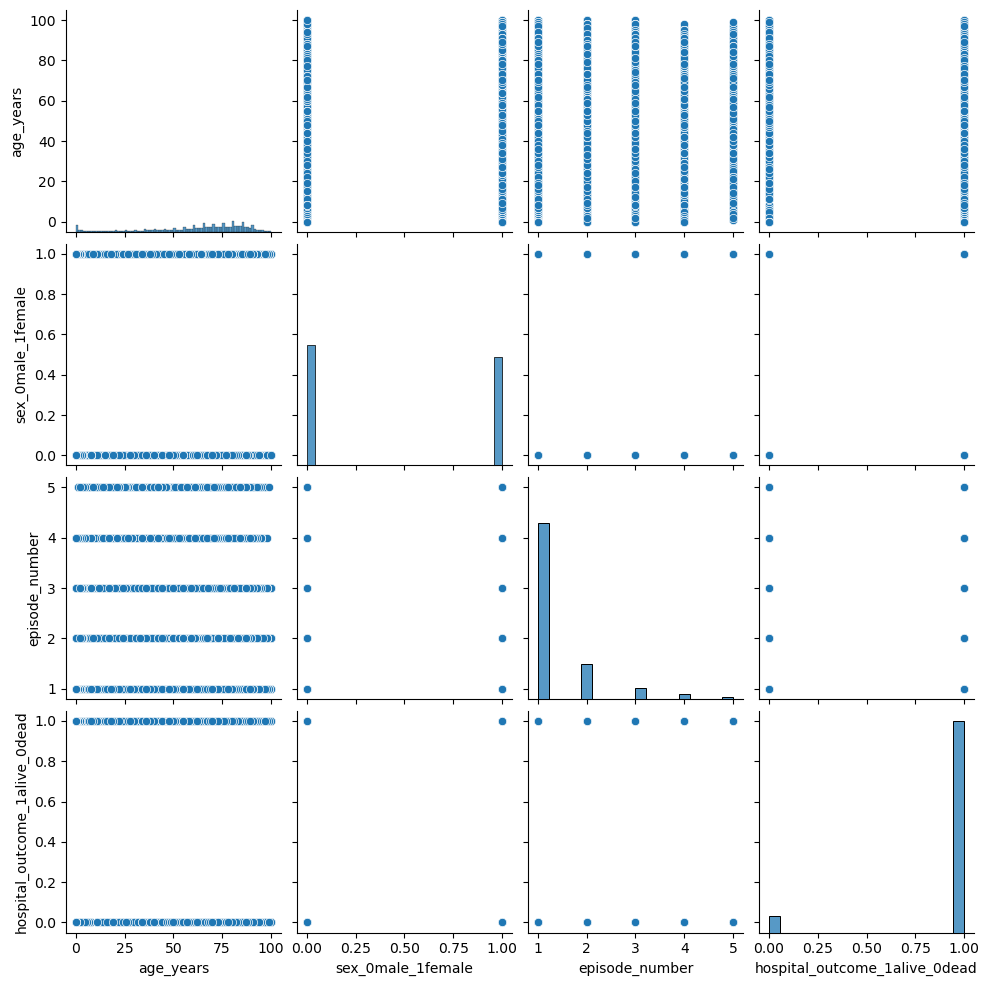

In [19]:
sns.pairplot(data)

<Axes: >

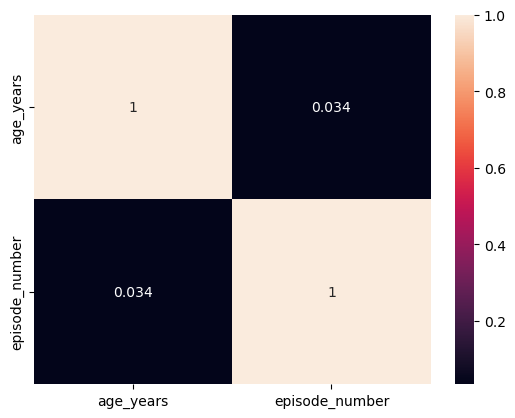

In [20]:
sns.heatmap(data[['age_years','episode_number']].corr(),annot=True)

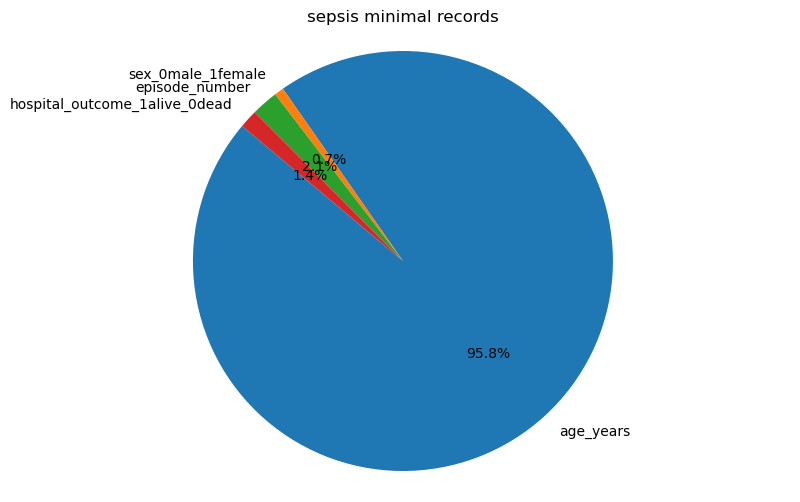

In [21]:
param = data[['age_years','sex_0male_1female','episode_number','hospital_outcome_1alive_0dead']]
plt.figure(figsize=(10,6))
plt.pie(param.sum(),labels=param.columns,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('sepsis minimal records')
plt.show()

In [22]:
#x variable are independent and y variable are dependent
x= data.drop('hospital_outcome_1alive_0dead',axis=1)
y= data['hospital_outcome_1alive_0dead']

In [23]:
#spliting the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=(0))

In [24]:
#checking the accuracy of the model using LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [25]:
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_train_pred = log.predict(x_train)
y_test_pred = log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [28]:
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1score = f1_score(y_train,y_train_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1score = f1_score(y_test,y_test_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
print("log train accuracy:",train_accuracy)
print("log test accuracy:",test_accuracy)
print("log train precision:",train_precision)
print("log test precision:",test_precision)
print("log train recall:",train_recall)
print("log test recall:",test_recall)
print("log train f1score:",train_f1score)
print("log test f1score:",test_f1score)

log train accuracy: 0.9266028881802391
log test accuracy: 0.9261085233803158
log train precision: 0.8585929123839606
log test precision: 0.8576769970776689
log train recall: 0.9266028881802391
log test recall: 0.9261085233803158
log train f1score: 0.8913024242322601
log test f1score: 0.8905801377924935


In [31]:
#checking the accuracy of the model using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [34]:
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1score = f1_score(y_train,y_train_pred,average='weighted')

In [35]:
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1score = f1_score(y_test,y_test_pred,average='weighted')

In [36]:
print("knn train accuracy:",train_accuracy)
print("knn test accuracy:",test_accuracy)
print("knn train precision:",train_precision)
print("knn test precision:",test_precision)
print("knn train recall:",train_recall)
print("knn test recall:",test_recall)
print("knn train f1score:",train_f1score)
print("knn test f1score:",test_f1score)

knn train accuracy: 0.9123305073760078
knn test accuracy: 0.9103502510434941
knn train precision: 0.8705589569676339
knn test precision: 0.8674201146501903
knn train recall: 0.9123305073760078
knn test recall: 0.9103502510434941
knn train f1score: 0.8885539762024173
knn test f1score: 0.8864086613261192


In [37]:
#checking the accuracy of the model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [40]:
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1score = f1_score(y_train,y_train_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1score = f1_score(y_test,y_test_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
print("dt train accuracy:",train_accuracy)
print("dt test accuracy:",test_accuracy)
print("dt train precision:",train_precision)
print("dt test precision:",test_precision)
print("dt train recall:",train_recall)
print("dt test recall:",test_recall)
print("dt train f1score:",train_f1score)
print("dt test f1score:",test_f1score)

dt train accuracy: 0.9266028881802391
dt test accuracy: 0.9261085233803158
dt train precision: 0.8585929123839606
dt test precision: 0.8576769970776689
dt train recall: 0.9266028881802391
dt test recall: 0.9261085233803158
dt train f1score: 0.8913024242322601
dt test f1score: 0.8905801377924935


In [43]:
#checking accuracy using randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=2,max_depth=2,criterion='entropy',bootstrap= True)

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=2)

In [45]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [46]:
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1score = f1_score(y_train,y_train_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1score = f1_score(y_test,y_test_pred,average='weighted')

C:\Users\SHIVANI\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
print("rf train accuracy:",train_accuracy)
print("rf test accuracy:",test_accuracy)
print("rf train precision:",train_precision)
print("rf test precision:",test_precision)
print("rf train recall:",train_recall)
print("rf test recall:",test_recall)
print("rf train f1score:",train_f1score)
print("rf test f1score:",test_f1score)

rf train accuracy: 0.9266028881802391
rf test accuracy: 0.9261085233803158
rf train precision: 0.8585929123839606
rf test precision: 0.8576769970776689
rf train recall: 0.9266028881802391
rf test recall: 0.9261085233803158
rf train f1score: 0.8913024242322601
rf test f1score: 0.8905801377924935


Text(0.5, 1.0, 'prediction error')

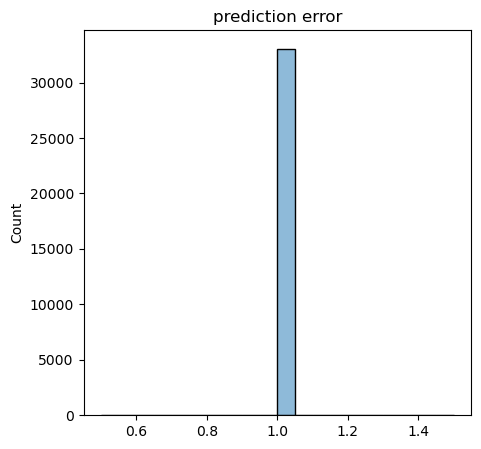

In [49]:
#evaluating model
plt.figure(figsize=(5,5))
sns.histplot(y_test_pred,bins=20,kde=True)
plt.title("prediction error")

In [50]:
import pickle
pickle.dump(rf,open('sepsis.pkl','wb'))

In [113]:
pickle.load(open('sepsis.pkl','rb'))

rf.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
x_train.dtypes

age_years            int64
sex_0male_1female    int64
episode_number       int64
dtype: object